# Continuous actions : Highway env

In [1]:
!pip install gymnasium
!pip install highway-env

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
import gymnasium as gym
from matplotlib import pyplot as plt
import pprint
import highway_env
%matplotlib inline

Matplotlib created a temporary cache directory at /tmp/matplotlib-h50sg_fn because the default path (/home/zealous_easley/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


/home/zealous_easley/.local/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn(
/home/zealous_easley/.local/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn(
/home/zealous_easley/.local/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.actio

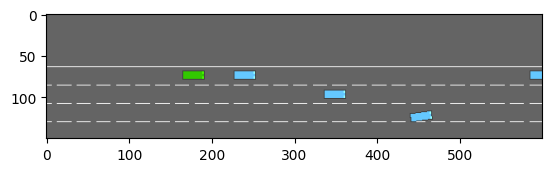

In [3]:
env = gym.make('highway-v0', render_mode='rgb_array')
env.reset()
for _ in range(3):
    action = env.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()

In [14]:
env_config = {
    "action": {
        "type": "ContinuousAction",
    }
}

env.unwrapped.configure(env_config)


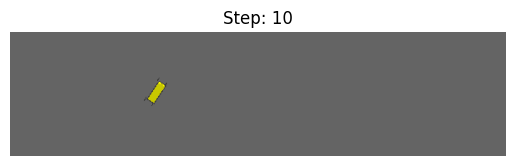

In [4]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Create and configure the environment for continuous actions
env = gym.make("highway-v0", render_mode='rgb_array')
env.configure({
    "action": {
        "type": "ContinuousAction",
        "longitudinal": True,
        "lateral": True
    },
    # Other configurations as necessary
})
observation = env.reset()

# Visualize initial state
plt.imshow(env.render())
plt.title("Initial State")
plt.axis('off')  # Hide axes
plt.show()

# Perform 10 steps with random continuous actions
for step in range(10):
    action = env.action_space.sample()  # Sample a random action
    observation, reward, done, truncated, info = env.step(action)  # Adjusted to include 'truncated'
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.title(f"Step: {step + 1}")
    plt.axis('off')
    plt.show()
    time.sleep(0.1)  # Pause for a moment to see the image
    if done or truncated:  # Check both done and truncated
        print("Episode ended after this step. Resetting environment.")
        observation = env.reset()


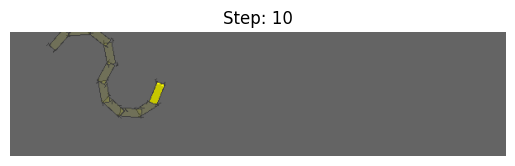

In [9]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Create and configure the environment
env = gym.make("highway-v0", render_mode="rgb_array")

# Apply the configuration
config = {
    "observation": {
        "type": "OccupancyGrid",
        "vehicles_count": 5,
        "features": ["presence", "x", "y", "vx", "vy", "cos_h", "sin_h"],
        "features_range": {
            "x": [-100, 100],  
            "y": [-100, 100],
            "vx": [-20, 20],
            "vy": [-20, 20],
        },
        "grid_size": [[-20, 20], [-20, 20]],
        "grid_step": [5, 5],
        "absolute": False,
    },
    "action": {
        "type": "ContinuousAction",
    },
    "lanes_count": 3,
    "vehicles_count": 10,
    "duration": 20,
    "initial_spacing": 0,
    "collision_reward": -1,
    "right_lane_reward": 0.5,
    "high_speed_reward": 0.1,
    "lane_change_reward": 0,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 5,
    "policy_frequency": 1,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "screen_width": 600,
    "screen_height": 150,
    "centering_position": [0.3, 0.5],
    "scaling": 5.5,
    "show_trajectories": True,
    "render_agent": True,
    "offscreen_rendering": False,
    "disable_collision_checks": True,
}

env.unwrapped.configure(config)  # Adjust this if `configure` method does not exist
observation = env.reset()

# Visualize initial state
plt.imshow(env.render())
plt.title("Initial State")
plt.axis('off')  # Hide axes
plt.show()

# Perform 10 steps with random continuous actions
for step in range(10):
    action = env.action_space.sample()  # Sample a random action
    print(action)
    observation, reward, done, truncated, info = env.step(action)
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.title(f"Step: {step + 1}")
    plt.axis('off')
    plt.show()
    time.sleep(0.1)  # Pause for a moment to see the image
    if done or truncated:
        print("Episode ended after this step. Resetting environment.")
        observation = env.reset()

# Close the environment when done
env.close()


In [7]:
print(env.action_space)

Box(-1.0, 1.0, (2,), float32)


In [60]:
print("Observation space:", env.observation_space)

Observation space: Box(-inf, inf, (7, 8, 8), float32)


In [61]:
pprint.pprint(env.config)

{'action': {'type': 'ContinuousAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'disable_collision_checks': True,
 'duration': 20,
 'ego_spacing': 2,
 'high_speed_reward': 0.1,
 'initial_lane_id': None,
 'initial_spacing': 0,
 'lane_change_reward': 0,
 'lanes_count': 3,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'absolute': False,
                 'features': ['presence',
                              'x',
                              'y',
                              'vx',
                              'vy',
                              'cos_h',
                              'sin_h'],
                 'features_range': {'vx': [-20, 20],
                                    'vy': [-20, 20],
                                    'x': [-100, 100],
                                    'y': [-100, 100]},
                 'grid_size': [[-20, 20], [-20, 20]],
                 'grid_step': [5, 5],
                 'typ

/home/zealous_easley/.local/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.config to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.config` for environment variables or `env.get_wrapper_attr('config')` that will search the reminding wrappers.
  logger.warn(


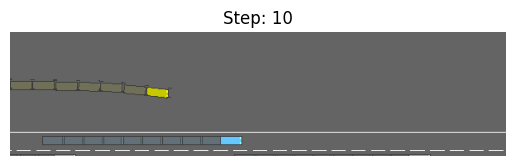

In [13]:
import numpy as np

# Defining a function to sample minor steering and acceleration
def sample_small_actions():
    # Sample steering and acceleration in the range [-0.05, 0.05]
    acceleration = np.random.uniform(-0.05, 0.05)
    steering = np.random.uniform(-0.05, 0.05)
    #steering = 0
    return np.array([acceleration, steering], dtype=np.float32)

# Now we use this function in our loop
for _ in range(10):
    action = sample_small_actions()
    observation, reward, done, truncated, info = env.step(action)
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.title(f"Step: {step + 1}")
    plt.axis('off')
    plt.show()
    time.sleep(0.1)  # Pause for a moment to see the image
    if done or truncated:
        print("Episode ended after this step. Resetting environment.")
        observation = env.reset()

# Close the environment when done
env.close()


The behavior we're observing, with the car going off-track with the continuous action space, is likely due to the nature of the random actions being sampled. When we use action_space.sample(), it generates actions without any consideration for the task at hand — in this case, staying on the road.

# First attempt at training : DDPG

In [14]:
import numpy as np
from collections import deque
import random
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.autograd
from torch.autograd import Variable
import torch.optim as optim
import sys
import pandas as pd
import matplotlib.pyplot as plt

import gym
import highway_env

In [37]:
# Ornstein-Ulhenbeck Process
class OUNoise(object):
    def __init__(self, action_space, mu=0.0, theta=0.15, max_sigma=0.3, min_sigma=0.3, decay_period=100000):
        self.mu           = mu
        self.theta        = theta
        self.sigma        = max_sigma
        self.max_sigma    = max_sigma
        self.min_sigma    = min_sigma
        self.decay_period = decay_period
        self.action_dim   = action_space.shape[0]
        #print(f"Action dimension: {self.action_dim}, Low: {action_space.low}, High: {action_space.high}")
        self.low          = action_space.low
        self.high         = action_space.high
        self.reset()
        
    def reset(self):
        self.state = np.ones(self.action_dim) * self.mu
        
    def evolve_state(self):
        x  = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(self.action_dim)
        self.state = x + dx
        return self.state
    
    def get_action(self, action, t=0):
        ou_state = self.evolve_state()
        self.sigma = self.max_sigma - (self.max_sigma - self.min_sigma) * min(1.0, t / self.decay_period)
        new_action = np.clip(action + ou_state, self.low, self.high)
        #print(f"New action from OUNoise: {new_action}, Shape: {new_action.shape}")
        return new_action

class NormalizedEnv(gym.ActionWrapper):
    """ Wrap action """

    def _action(self, action):
        act_k = (self.action_space.high - self.action_space.low)/ 2.
        act_b = (self.action_space.high + self.action_space.low)/ 2.
        return act_k * action + act_b

    def _reverse_action(self, action):
        act_k_inv = 2./(self.action_space.high - self.action_space.low)
        act_b = (self.action_space.high + self.action_space.low)/ 2.
        return act_k_inv * (action - act_b)
        

class Memory:
    def __init__(self, max_size):
        self.max_size = max_size
        self.buffer = deque(maxlen=max_size)
    
    def push(self, state, action, reward, next_state, done):
        experience = (state, action, np.array([reward]), next_state, done)
        self.buffer.append(experience)

    def sample(self, batch_size):
        state_batch = []
        action_batch = []
        reward_batch = []
        next_state_batch = []
        done_batch = []

        batch = random.sample(self.buffer, batch_size)

        for experience in batch:
            state, action, reward, next_state, done = experience
            state_batch.append(state)
            action_batch.append(action)
            reward_batch.append(reward)
            next_state_batch.append(next_state)
            done_batch.append(done)
        
        return state_batch, action_batch, reward_batch, next_state_batch, done_batch

    def __len__(self):
        return len(self.buffer)


In [26]:
agento = OUNoise(env.action_space)

Action dimension: 2, Low: [-1. -1.], High: [1. 1.]


In [38]:
class Critic(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Critic, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)

    def forward(self, state, action):
        """
        Params state and actions are torch tensors
        """
        action = action.squeeze()
        x = torch.cat([state, action], 1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)

        return x

class Actor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 3e-4):
        super(Actor, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, state):
        """
        Param state is a torch tensor
        """
        x = F.relu(self.linear1(state))
        x = F.relu(self.linear2(x))
        x = torch.tanh(self.linear3(x))

        return x

In [17]:
env.observation_space.shape[0]

7

In [18]:
np.prod(env.observation_space.shape)

448

In [19]:
env.action_space.shape[0]

2

In [39]:
class DDPGagent:
    def __init__(self, env, hidden_size=256, actor_learning_rate=1e-4, critic_learning_rate=1e-3, gamma=0.99, tau=0.005, max_memory_size=50000):
        # Params
        self.num_states = np.prod(env.observation_space.shape)
        # self.num_states = env.observation_space.shape[0]
        self.num_actions = env.action_space.shape[0]
        self.gamma = gamma
        self.tau = tau

        # Networks
        self.actor = Actor(self.num_states, hidden_size, self.num_actions)
        self.actor_target = Actor(self.num_states, hidden_size, self.num_actions)
        self.critic = Critic(self.num_states + self.num_actions, hidden_size, self.num_actions)
        self.critic_target = Critic(self.num_states + self.num_actions, hidden_size, self.num_actions)

        # Debugging code to test the output shape of the Actor network
        #dummy_state = torch.rand(1, self.num_states)  # Create a dummy state tensor
        #action_output = self.actor(dummy_state)       # Get the output from the Actor network
        #print(f"Dummy output shape: {action_output.shape}")  # Print the shape of the output

        for target_param, param in zip(self.actor_target.parameters(), self.actor.parameters()):
            target_param.data.copy_(param.data)

        for target_param, param in zip(self.critic_target.parameters(), self.critic.parameters()):
            target_param.data.copy_(param.data)
        
        # Training
        print("training")
        self.memory = Memory(max_memory_size)        
        self.critic_criterion  = nn.MSELoss()
        self.actor_optimizer  = optim.Adam(self.actor.parameters(), lr=actor_learning_rate)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=critic_learning_rate)
    
    def get_action(self, state):
        state = Variable(torch.from_numpy(state).float().unsqueeze(0))
        action = self.actor.forward(state).detach().cpu().numpy()

        return action
    
    def update(self, batch_size):
        states, actions, rewards, next_states, _ = self.memory.sample(batch_size)
        # print(states)
        states = torch.FloatTensor(states)
        actions = torch.FloatTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
    
        # Critic loss        
        Qvals = self.critic.forward(states, actions)
        next_actions = self.actor_target.forward(next_states)
        next_Q = self.critic_target.forward(next_states, next_actions.detach())
        Qprime = rewards + self.gamma * next_Q
        critic_loss = self.critic_criterion(Qvals, Qprime)

        # Actor loss
        policy_loss = -self.critic.forward(states, self.actor.forward(states)).mean()
        
        # update networks
        self.actor_optimizer.zero_grad()
        policy_loss.backward()
        self.actor_optimizer.step()

        self.critic_optimizer.zero_grad()
        critic_loss.backward() 
        self.critic_optimizer.step()

        # update target networks 
        for target_param, param in zip(self.actor_target.parameters(), self.actor.parameters()):
            target_param.data.copy_(param.data * self.tau + target_param.data * (1.0 - self.tau))
       
        for target_param, param in zip(self.critic_target.parameters(), self.critic.parameters()):
            target_param.data.copy_(param.data * self.tau + target_param.data * (1.0 - self.tau))

In [59]:
# Example of creating an instance of DDPGagent which will trigger the __init__ method
agento = DDPGagent(env)


Dummy output shape: torch.Size([1, 2])
training


In [55]:
env.action_space.shape[0]

2

In [51]:
sample_action = env.action_space.sample()  # Take a sample action
output = env.step(sample_action)
print(f"Step method returned {len(output)} items")
print(output)

Step method returned 5 items
(array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        , 

In [40]:
agent = DDPGagent(env)
noise = OUNoise(env.action_space)
batch_size = 128
rewards = []
avg_rewards = []

for episode in range(100):
    state, info = env.reset()
    noise.reset()
    episode_reward = 0
    for step in range(500):
        # print(state)
        state = state.flatten()
        action = agent.get_action(state)
        #print(f"Original action: {action}")
        # action = agent.get_action(state)
        action = noise.get_action(action, step)
        #print(f"Noisy action: {action}")
        # print(action)
        new_state, reward, done, truncated, info = env.step(action[0]) 
        # print(reward)
        # print(state['observation'])
        agent.memory.push(state, action, reward, new_state, done)
        if len(agent.memory) > batch_size:
            agent.update(batch_size)        
        
        state = new_state
        episode_reward += reward

        if done:
            sys.stdout.write("episode: {}, reward: {}, average _reward: {} \n".format(episode, np.round(episode_reward, decimals=2), np.mean(rewards[-10:])))
            break

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

training


RuntimeError: mat1 and mat2 shapes cannot be multiplied (7168x8 and 448x256)

training


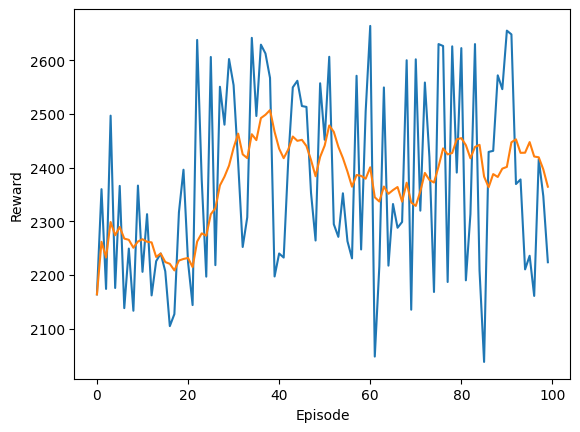

In [44]:
# Instantiate the agent and the Ornstein-Uhlenbeck process
agent = DDPGagent(env)
noise = OUNoise(env.action_space)
batch_size = 128
rewards = []
avg_rewards = []

def calculate_custom_reward(info):
    # Custom reward function that emphasizes speed and staying on the road
    reward = 0
    reward += max(0, info['speed'] / 10)  # Normalize speed to a positive value
    reward += info['rewards']['right_lane_reward']
    reward += info['rewards']['high_speed_reward']
    reward += info['rewards']['on_road_reward']
    if info['crashed']:
        reward -= 50  # Large penalty for crashing
    return reward

# Training Loop
for episode in range(100):
    raw_state, info = env.reset()  # Unpack the tuple returned by env.reset()
    state = raw_state.flatten()
    #print(f"Contents of state: {state}")
    # Assuming state is a NumPy array, we can directly flatten it
    noise.reset()
    episode_reward = 0
    
    for step in range(500):
        action = agent.get_action(state)
        action = noise.get_action(action, step)
        new_state, reward, done, truncated, info = env.step(action[0])  # Correct unpacking
        reward = calculate_custom_reward(info)
        # print(f"Action: {action}, Reward: {reward}, Info: {info}")  # Debug output
        new_state = new_state.flatten()
        
        agent.memory.push(state, action, reward, new_state, done)
        
        if len(agent.memory) > batch_size:
            agent.update(batch_size)
        
        state = new_state
        episode_reward += reward

        if done:
            print(f"Episode: {episode}, total reward: {episode_reward}")
            break

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

# Plot the results
plt.plot(rewards)
plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

The graph shows the rewards per episode (blue line) and a moving average of the rewards (orange line) over 100 episodes. The moving average tends to smooth out the noise in the data, providing a clearer view of the trend over time.

- Interpretation : 

- Variability: The rewards per episode seem to have high variability, with some episodes achieving high rewards and others much lower. This could indicate that the agent's behavior is not yet consistent and is possibly still exploring the action space.
- Trend: The moving average provides a trend line of performance. If this line is moving upwards over time, it generally means that the agent is improving. In our graph, the moving average appears relatively flat with a slight downward trend, suggesting that overall learning progress might be slow or that the agent hasn't found a stable policy yet.
- Behavior Examination: To better understand why the agent receives such variable rewards, we would want to observe the agent's behavior directly in the environment.

In [45]:
print(agent.get_action(state))

[[ 1.        -0.7413714]]


In [57]:
def run_one_episode(env, agent, display=True):        
    done = False  
    state, _ = env.reset()
    state = np.array(state).flatten()
    rewards = 0        

    while not done:
        action = agent.get_action(state)  
        print(action)
        # Make sure action is an array with at least two elements
        #action = np.array(action)
        #if action.ndim == 0:  # If action is a scalar, convert it to an array with a second element
            #action = np.array([action, 0])  # Replace 0 with an appropriate value if needed

        # Ensure that action[0] (assumed to be acceleration) is non-negative
        #action[0] = np.clip(action[0], 0, 1)

        print(f"Action taken: {action}")
        state, reward, done, _, _ = env.step(action[0])
        state = np.array(state).flatten()
        rewards += reward        
        
        if display:         
            clear_output(wait=True)        
            plt.imshow(env.render())
            plt.show()        
    
    if display:        
        env.close()        
    
    print(f"Episode total reward: {rewards}")

# Run one episode to test
run_one_episode(env, agent, display=True)


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [49]:
!pip install stable_baselines3

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for stable_baselines3 from https://files.pythonhosted.org/packages/06/6a/c3098a78a63b5a48e18c11d80b8c532f8b7785d6abb1329cfe3034572161/stable_baselines3-2.3.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 6.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [55]:
import gym
import highway_env
import numpy as np

from stable_baselines3 import HER, DDPG
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3 import PPO

In [56]:
# Create the action noise object that will be used for exploration
n_actions = env.action_space.shape[0]
noise_std = 0.2
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=noise_std * np.ones(n_actions))
batch_size = 64
model = PPO(
    "MlpPolicy",
    env,
    policy_kwargs=dict(net_arch=[dict(pi=[256, 256], vf=[256, 256])]),
    batch_size=batch_size,
    n_epochs=10,
    learning_rate=5e-4,
    gamma=0.8,
    verbose=2,
)

# Train the model
model.learn(total_timesteps=int(5e4))
model.save("racetrack_ppo/model")
del model

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/zealous_easley/.local/lib/python3.8/site-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20       |
|    ep_rew_mean     | 1.66     |
| time/              |          |
|    fps             | 31       |
|    iterations      | 1        |
|    time_elapsed    | 65       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 19.7        |
|    ep_rew_mean          | 2.23        |
| time/                   |             |
|    fps                  | 30          |
|    iterations           | 2           |
|    time_elapsed         | 134         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005093258 |
|    clip_fraction        | 0.0831      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.84       |
|    explained_variance   | 0.00575     |
|    learning_rate        | 0.

/home/zealous_easley/.local/lib/python3.8/site-packages/stable_baselines3/common/save_util.py:284: UserWarning: Path 'racetrack_ppo' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [61]:
!pip install moviepy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 7.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for decorator<5.0,>=4.0.2 from https://files.pythonhosted.org/packages/ed/1b/72a1821152d07cf1d8b6fce298aeb06a7eb90f4d6d41acec9861e7cc6df0/decorator-4.4.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for proglog<=1.0.0 from https://files.pythonhosted.org/packages/8b/f5/cab5cf6a540c31f5099043de0ae43990fd9cf66f75ecb5e9f254a4e4d4ee/proglog-0.1.10-py3-none-any.whl.metadata
  Obtaining dependency information for imageio_ffmpeg>=0.2.0 from https://files.pythonhosted.org/packages/1a/98/3df1d8dd8f2c121b6c588b1e0d604f36592d56df9c41fb155ed546c6a5ed/imageio_ffmpeg-0.4.9-py3-none-manylinux2010_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 35.0 MB/s eta 0:00:0000:0100:01
  Created wheel for moviepy: filename=movie

In [59]:
from gymnasium.wrappers import RecordVideo

In [65]:
model = PPO.load("highway_ppo/model", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [73]:
def evaluate_model(env, model, num_episodes=100):
    episode_rewards = []

    for episode in range(num_episodes):
        obs = env.reset()  # Ensure only the observation is used
        done = False
        total_rewards = 0

        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, info = env.step(action)
            total_rewards += reward

        episode_rewards.append(total_rewards)
        print(f"Episode {episode + 1}: Total Reward = {total_rewards}")

    return episode_rewards

# Load the trained model
model = PPO.load("highway_ppo/model", env=env)

# Evaluate the model
rewards = evaluate_model(env, model, num_episodes=100)

# Plot the rewards
plt.figure(figsize=(10, 5))
plt.plot(rewards)
plt.title('Evaluation Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


ValueError: You have passed a tuple to the predict() function instead of a Numpy array or a Dict. You are probably mixing Gym API with SB3 VecEnv API: `obs, info = env.reset()` (Gym) vs `obs = vec_env.reset()` (SB3 VecEnv). See related issue https://github.com/DLR-RM/stable-baselines3/issues/1694 and documentation for more information: https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html#vecenv-api-vs-gym-api